In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\Qianyu\Anaconda3\envs\ml\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
df = web.get_data_yahoo('GC=F', start = '2015-01-15', end = '2020-05-28')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-15,1265.000000,1227.300049,1231.500000,1264.699951,21.0,1264.699951
2015-01-16,1279.699951,1256.099976,1256.099976,1276.900024,130.0,1276.900024
2015-01-20,1297.300049,1273.800049,1278.900024,1294.199951,44.0,1294.199951
2015-01-21,1303.500000,1286.699951,1295.199951,1293.699951,157.0,1293.699951
2015-01-22,1302.099976,1283.500000,1293.199951,1300.699951,78.0,1300.699951
...,...,...,...,...,...,...
2020-05-24,1732.599976,1729.599976,1731.300049,1730.099976,93921.0,1730.099976
2020-05-25,1731.500000,1718.000000,1728.000000,1726.500000,30101859.0,1726.500000
2020-05-26,1736.400024,1700.000000,1736.300049,1705.000000,178760046.0,1705.000000


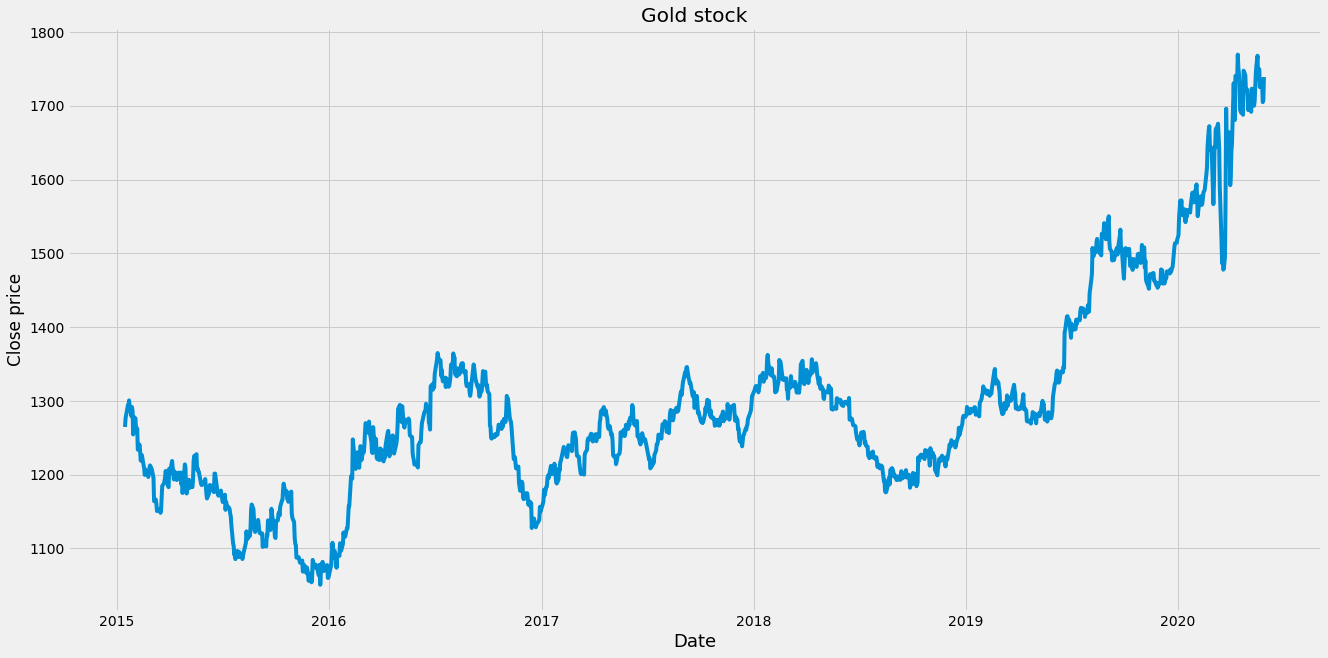

In [3]:
plt.figure(figsize=(20,10))
plt.title('Gold stock')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price')
plt.show()

In [4]:
dataset = df.filter(['Close']).values
training_len = math.ceil(len(dataset)*0.8)
training_len

1087

In [5]:
dataset

array([[1264.69995117],
       [1276.90002441],
       [1294.19995117],
       ...,
       [1705.        ],
       [1707.5       ],
       [1739.        ]])

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.297662  ],
       [0.31463955],
       [0.33871404],
       ...,
       [0.91038126],
       [0.91386025],
       [0.95769548]])

In [7]:
training_data = scaled_data[0:training_len,:]
x_train = []
y_train = []

for i in range(50, len(training_data)):
    x_train.append(training_data[i-50:i, 0])
    y_train.append(training_data[i, 0])
x_train,y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1037, 50)

In [8]:
#LSTM input has three demontions: number of samples, number of time steps and number of features.
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [9]:
model = Sequential()
#input_shape(#of time step,# of features) for first layer
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(20))
model.add(Dense(1))

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
model.fit(x_train,y_train,batch_size=1, epochs=5)

Epoch 1/5
1037/1037 [==============================] - 61s 59ms/step - loss: 0.0014
Epoch 2/5
1037/1037 [==============================] - 58s 56ms/step - loss: 5.1660e-04
Epoch 3/5
1037/1037 [==============================] - 56s 54ms/step - loss: 3.6133e-04
Epoch 4/5
1037/1037 [==============================] - 55s 53ms/step - loss: 3.4348e-04
Epoch 5/5
1037/1037 [==============================] - 55s 53ms/step - loss: 3.4897e-04


In [12]:
test_data=scaled_data[training_len-50: , :]
x_test = []
y_test = dataset[training_len: , :]
for i in range(50, len(test_data)):
    x_test.append(test_data[i-50:i, 0])

In [13]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [14]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction) 

In [15]:
rmse = np.sqrt(np.mean(prediction - y_test) ** 2)
rmse

1.4354883172855166

                  Close  Predictions
Date                                
2019-05-23  1284.800049  1274.257324
2019-05-24  1283.000000  1284.989746
2019-05-28  1276.500000  1283.371826
2019-05-29  1280.599976  1277.199463
2019-05-30  1287.099976  1281.088257
...                 ...          ...
2020-05-24  1730.099976  1736.744507
2020-05-25  1726.500000  1715.779175
2020-05-26  1705.000000  1720.650146
2020-05-27  1707.500000  1689.539795
2020-05-28  1739.000000  1709.239380

[271 rows x 2 columns]


C:\Users\Qianyu\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


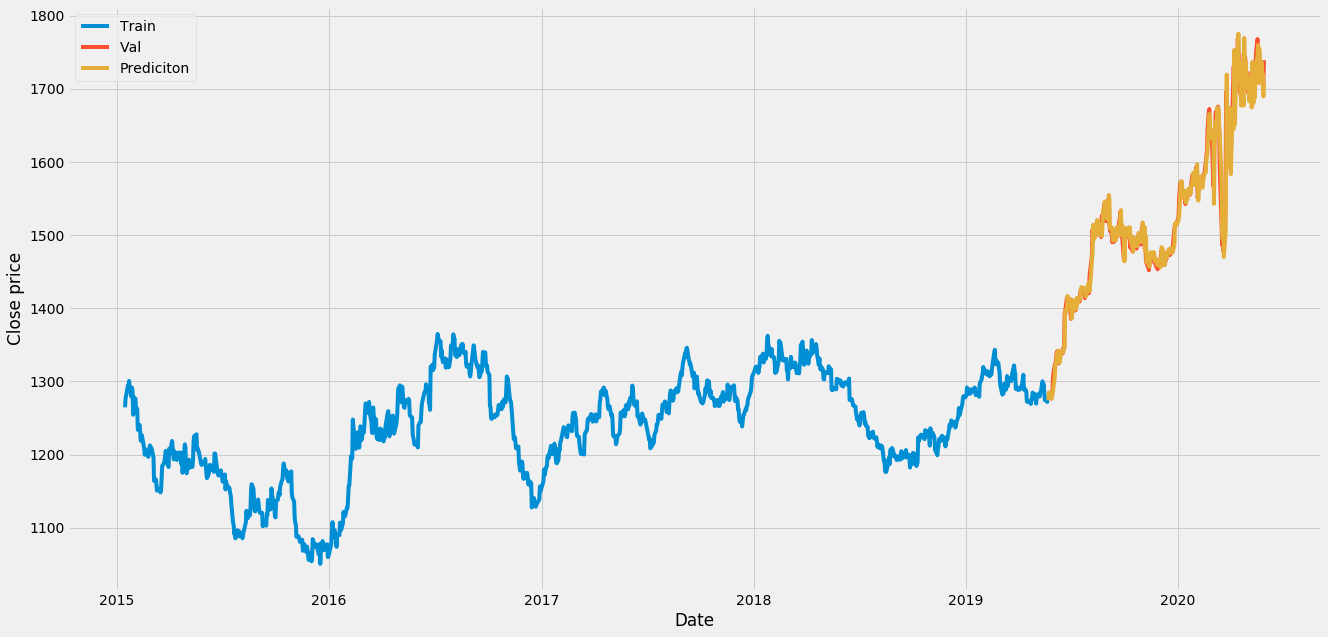

In [53]:
data = df.filter(['Close'])
train = data[:training_len]
valid = data[training_len:]
valid['Predictions'] = prediction
print(valid)
plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Close price')
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(valid['Predictions'])
plt.legend(['Train','Val', 'Prediciton'])

In [54]:
last_data = data[-50:].values
last_scaled = scaler.transform(last_data)
X_test1 = []
X_test1.append(last_scaled)
X_test = np.array(X_test1)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price1 = scaler.inverse_transform(pred_price)
pred_price = np.reshape(pred_price,(1, 1, 1))
pred_price1 = np.reshape(pred_price1,(1))[0]
pred_price1

1743.1796